# Time Series Decomposition Demo

This notebook demonstrates the RTDIP Time Series Decomposition components:
- **STLDecomposition** - Robust STL method 
- **ClassicalDecomposition** - Traditional additive/multiplicative
- **MSTLDecomposition** - Multiple seasonal patterns


In [21]:
import sys
sys.path.insert(0, '../src/sdk/python')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from rtdip_sdk.pipelines.decomposition.pandas import STLDecomposition, ClassicalDecomposition, MSTLDecomposition

np.random.seed(42)
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('seaborn-v0_8-darkgrid')

## 1. STL Decomposition (recommended for single trend)

In [2]:
# Create synthetic data with weekly seasonality
n_points = 365
dates = pd.date_range('2024-01-01', periods=n_points, freq='D')
trend = np.linspace(10, 20, n_points)
seasonal = 5 * np.sin(2 * np.pi * np.arange(n_points) / 7)
noise = np.random.randn(n_points) * 0.5
value = trend + seasonal + noise

df_synthetic = pd.DataFrame({'timestamp': dates, 'value': value})
print(f"Created {len(df_synthetic)} data points")
df_synthetic.head()

Created 365 data points


,timestamp,value
0,2024-01-01,10.248357
1,2024-01-02,13.867498
2,2024-01-03,15.253429
3,2024-01-04,13.013351
4,2024-01-05,7.823395


In [3]:
# STL Decomposition
stl_decomposer = STLDecomposition(
    df=df_synthetic,
    value_column='value',
    timestamp_column='timestamp',
    period=7,
    robust=True
)
result_stl = stl_decomposer.decompose()
print("STL Decomposition completed!")
result_stl.head()

STL Decomposition completed!


,timestamp,value,trend,seasonal,residual
0,2024-01-01,10.248357,10.354541,-0.038388,-0.067795
1,2024-01-02,13.867498,10.357026,3.468987,0.041485
2,2024-01-03,15.253429,10.358877,4.966470,-0.071918
3,2024-01-04,13.013351,10.360178,2.505882,0.147291
4,2024-01-05,7.823395,10.361105,-2.565190,0.027479


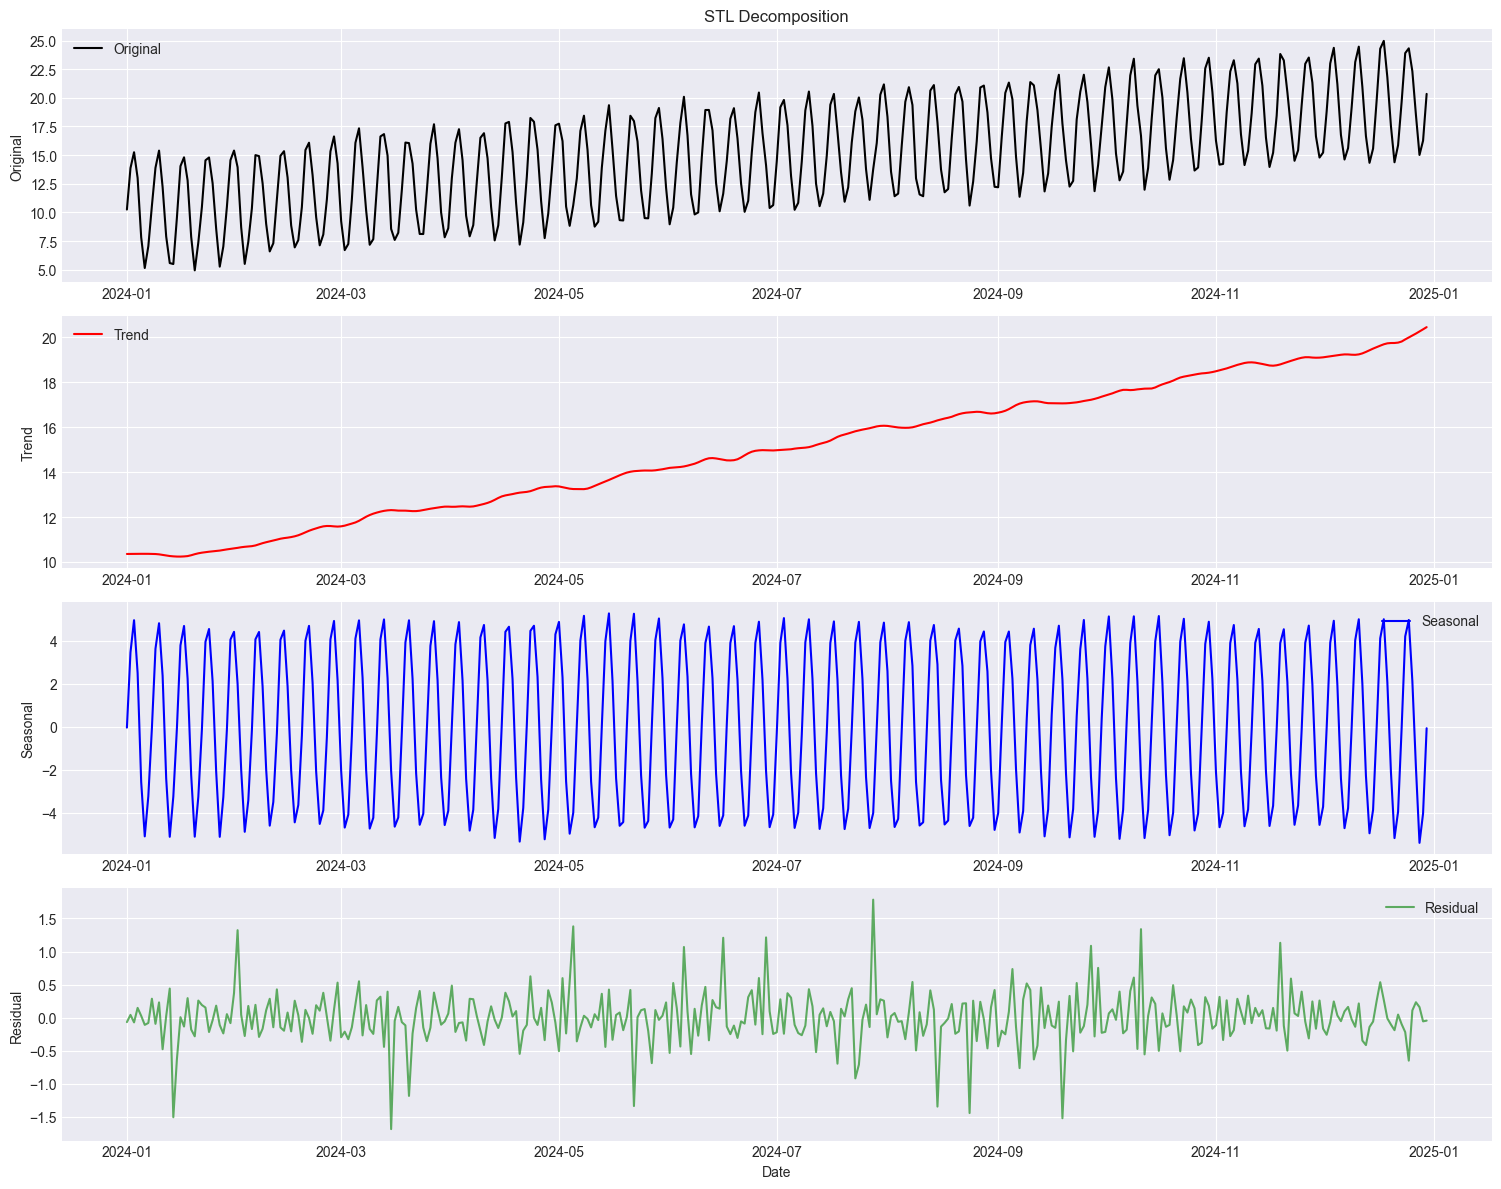

In [4]:
# Visualize STL results
fig, axes = plt.subplots(4, 1, figsize=(15, 12))

axes[0].plot(result_stl['timestamp'], result_stl['value'], 'k-', label='Original')
axes[0].set_ylabel('Original')
axes[0].set_title('STL Decomposition')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(result_stl['timestamp'], result_stl['trend'], 'r-', label='Trend')
axes[1].set_ylabel('Trend')
axes[1].legend()
axes[1].grid(True)

axes[2].plot(result_stl['timestamp'], result_stl['seasonal'], 'b-', label='Seasonal')
axes[2].set_ylabel('Seasonal')
axes[2].legend()
axes[2].grid(True)

axes[3].plot(result_stl['timestamp'], result_stl['residual'], 'g-', alpha=0.6, label='Residual')
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Date')
axes[3].legend()
axes[3].grid(True)

plt.tight_layout()
plt.show()

## 2. Classical Decomposition

In [5]:
# Additive decomposition
classical_decomposer = ClassicalDecomposition(
    df=df_synthetic,
    value_column='value',
    timestamp_column='timestamp',
    model='additive',
    period=7
)
result_classical = classical_decomposer.decompose()
print("Classical Additive Decomposition completed!")
result_classical.head()

Classical Additive Decomposition completed!


,timestamp,value,trend,seasonal,residual
0,2024-01-01,10.248357,NaN,-0.044704,NaN
1,2024-01-02,13.867498,NaN,3.986875,NaN
2,2024-01-03,15.253429,NaN,4.789094,NaN
3,2024-01-04,13.013351,10.342424,2.195520,0.475407
4,2024-01-05,7.823395,10.389234,-2.206457,-0.359382


In [6]:
# Multiplicative decomposition
trend_mult = np.linspace(10, 20, n_points)
seasonal_mult = 1 + 0.3 * np.sin(2 * np.pi * np.arange(n_points) / 7)
noise_mult = 1 + np.random.randn(n_points) * 0.05
value_mult = trend_mult * seasonal_mult * noise_mult

df_mult = pd.DataFrame({'timestamp': dates, 'value': value_mult})

mult_decomposer = ClassicalDecomposition(
    df=df_mult,
    value_column='value',
    timestamp_column='timestamp',
    model='multiplicative',
    period=7
)
result_mult = mult_decomposer.decompose()
print("Classical Multiplicative Decomposition completed!")

Classical Multiplicative Decomposition completed!


## 3. MSTL Decomposition (Multiple Seasonality)

In [22]:
# Create data with multiple seasonal patterns (hourly with daily + weekly)
n_hours = 24 * 60  # 60 days
dates_hourly = pd.date_range('2024-01-01', periods=n_hours, freq='h')
trend_multi = np.linspace(10, 15, n_hours)
daily_seasonal = 5 * np.sin(2 * np.pi * np.arange(n_hours) / 24)
weekly_seasonal = 3 * np.sin(2 * np.pi * np.arange(n_hours) / 168)
noise_multi = np.random.randn(n_hours) * 0.5
value_multi = trend_multi + daily_seasonal + weekly_seasonal + noise_multi

df_multi = pd.DataFrame({'timestamp': dates_hourly, 'value': value_multi})
print(f"Created {len(df_multi)} hourly data points")

Created 1440 hourly data points


In [ ]:
# MSTL decomposition with explicit integer periods
mstl_decomposer = MSTLDecomposition(
    df=df_multi,
    value_column='value',
    timestamp_column='timestamp',
    periods=[24, 168]  # Daily (24 hours) and weekly (168 hours)
    # windows=[25, 169] can be specified, but optional
)
result_mstl = mstl_decomposer.decompose()
print("MSTL Decomposition completed!")
print(f"Columns: {result_mstl.columns.tolist()}")
result_mstl.head()

MSTL Decomposition completed!
Columns: ['timestamp', 'value', 'trend', 'seasonal_24', 'seasonal_168', 'residual']


,timestamp,value,trend,seasonal_24,seasonal_168,residual
0,2024-01-01 00:00:00,10.248357,9.923550,0.150283,-0.104635,0.279160
1,2024-01-01 01:00:00,11.340611,9.927691,1.294284,0.025108,0.093528
2,2024-01-01 02:00:00,13.054984,9.931833,2.371809,0.362635,0.388706
3,2024-01-01 03:00:00,14.643366,9.935976,3.995227,0.341592,0.370571
4,2024-01-01 04:00:00,14.674076,9.940119,4.144971,0.325164,0.263821


## Alternative: Auto-calculate periods from sampling frequency

In [ ]:
# The periods are automatically calculated based on the sampling frequency

# For HOURLY data, use 'daily' and 'weekly' period strings
# (An 'hourly' period in hourly data would be 1 sample - too small!)
mstl_auto = MSTLDecomposition(
    df=df_multi,
    value_column='value',
    timestamp_column='timestamp',
    periods=['daily', 'weekly']  # Auto-calculated: 24 and 168 for hourly data
)
result_mstl_auto = mstl_auto.decompose()

print("MSTL with auto-calculated periods completed!")
print(f"Columns: {result_mstl_auto.columns.tolist()}")
print("\nVerify periods match:")
print(f"  'daily' -> seasonal_24 column: {'seasonal_24' in result_mstl_auto.columns}")
print(f"  'weekly' -> seasonal_168 column: {'seasonal_168' in result_mstl_auto.columns}")

# Both approaches produce similar results (may differ slightly due to default windows)
print(f"\nApproximate match in trend (max diff): {abs(result_mstl_auto['trend'] - result_mstl['trend']).max():.6f}")
result_mstl_auto.head()

MSTL with auto-calculated periods completed!
Columns: ['timestamp', 'value', 'trend', 'seasonal_24', 'seasonal_168', 'residual']

Verify periods match:
  'daily' -> seasonal_24 column: True
  'weekly' -> seasonal_168 column: True

Approximate match in trend (max diff): 0.000000


,timestamp,value,trend,seasonal_24,seasonal_168,residual
0,2024-01-01 00:00:00,10.248357,9.923550,0.150283,-0.104635,0.279160
1,2024-01-01 01:00:00,11.340611,9.927691,1.294284,0.025108,0.093528
2,2024-01-01 02:00:00,13.054984,9.931833,2.371809,0.362635,0.388706
3,2024-01-01 03:00:00,14.643366,9.935976,3.995227,0.341592,0.370571
4,2024-01-01 04:00:00,14.674076,9.940119,4.144971,0.325164,0.263821


## Visualize MSTL results

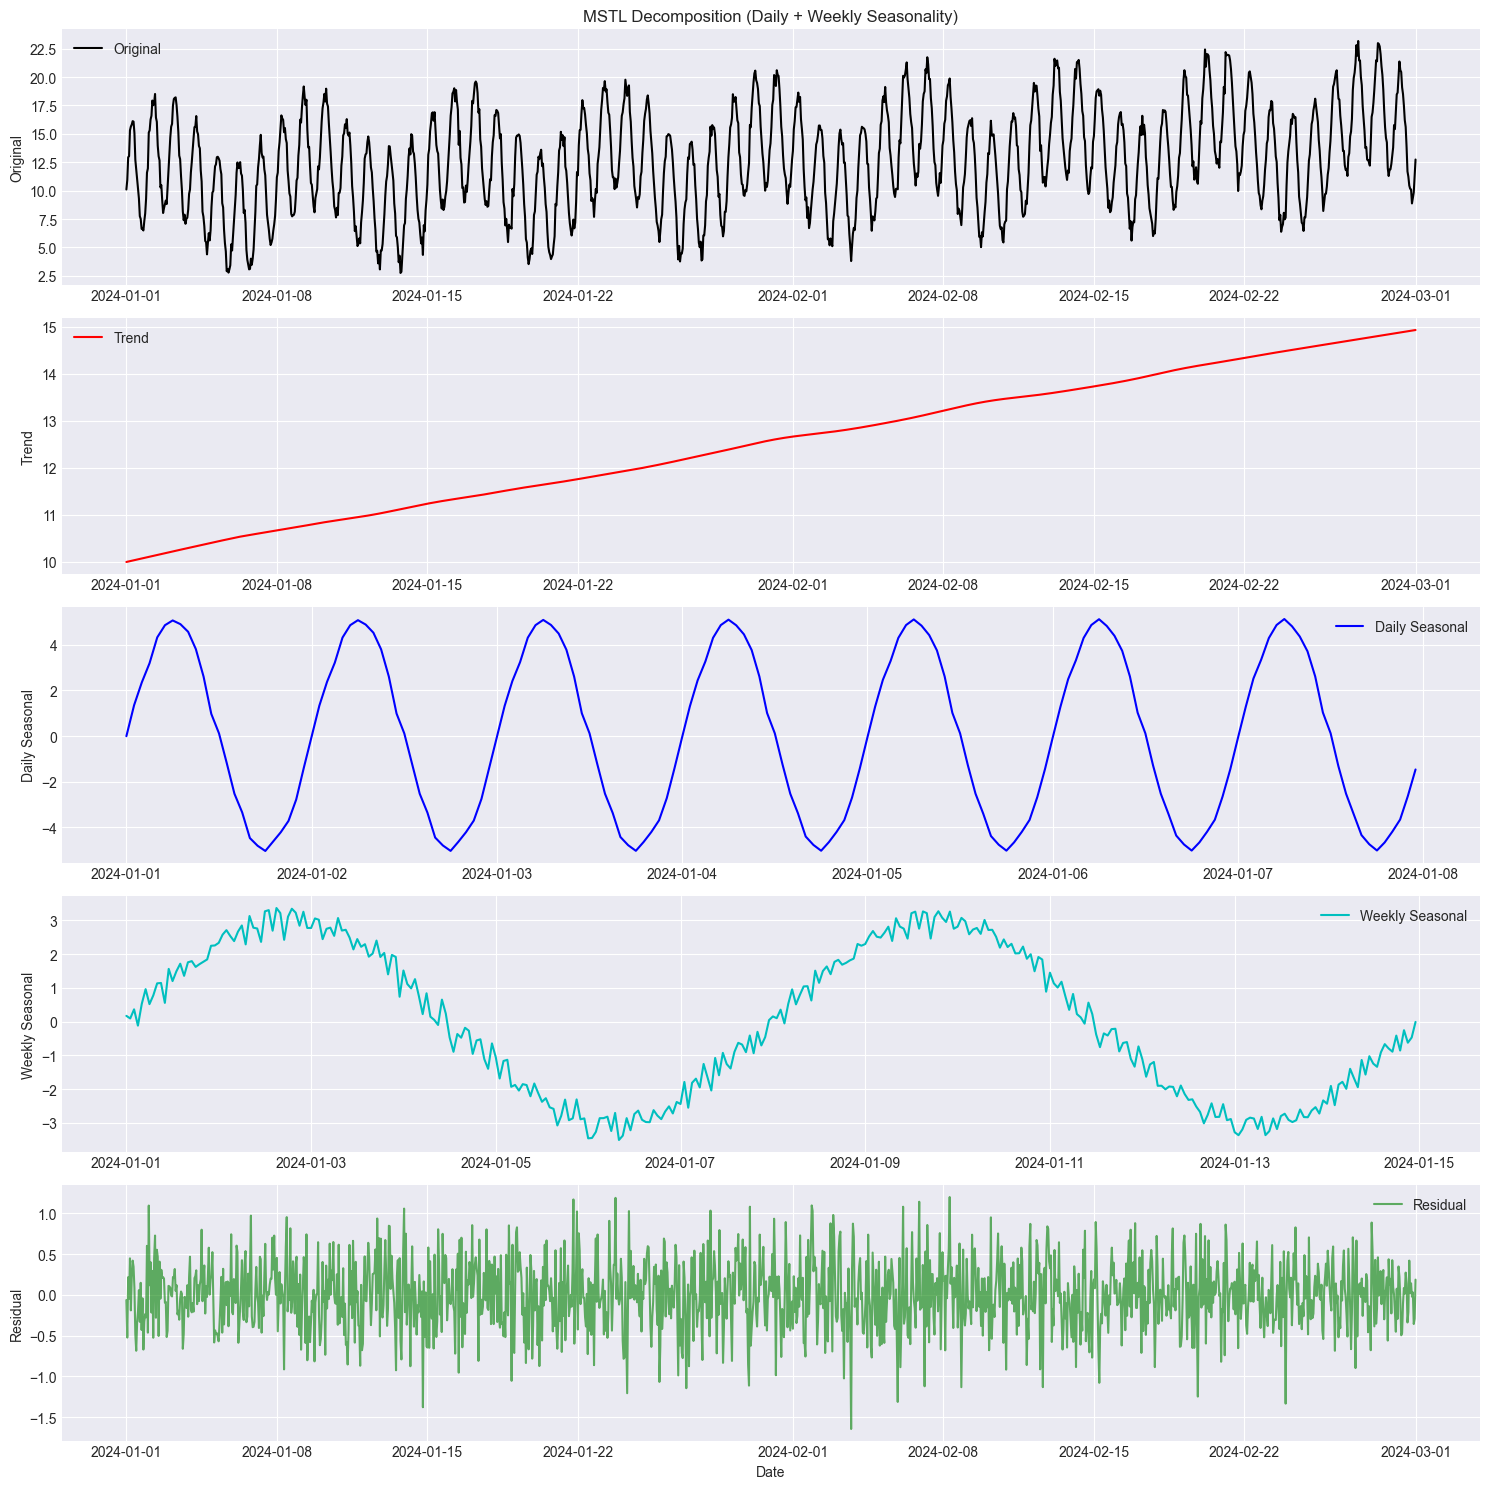

In [10]:
# Visualize MSTL results
fig, axes = plt.subplots(5, 1, figsize=(15, 15))

axes[0].plot(result_mstl['timestamp'], result_mstl['value'], 'k-', label='Original')
axes[0].set_ylabel('Original')
axes[0].set_title('MSTL Decomposition (Daily + Weekly Seasonality)')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(result_mstl['timestamp'], result_mstl['trend'], 'r-', label='Trend')
axes[1].set_ylabel('Trend')
axes[1].legend()
axes[1].grid(True)

axes[2].plot(result_mstl['timestamp'][:24*7], result_mstl['seasonal_24'][:24*7], 'b-', label='Daily Seasonal')
axes[2].set_ylabel('Daily Seasonal')
axes[2].legend()
axes[2].grid(True)

axes[3].plot(result_mstl['timestamp'][:24*14], result_mstl['seasonal_168'][:24*14], 'c-', label='Weekly Seasonal')
axes[3].set_ylabel('Weekly Seasonal')
axes[3].legend()
axes[3].grid(True)

axes[4].plot(result_mstl['timestamp'], result_mstl['residual'], 'g-', alpha=0.6, label='Residual')
axes[4].set_ylabel('Residual')
axes[4].set_xlabel('Date')
axes[4].legend()
axes[4].grid(True)

plt.tight_layout()
plt.show()